<a href="https://colab.research.google.com/github/andrebelem/ASTOC/blob/main/SNIPPET_3_Outra_forma_de_fazer_CROSS_Wavelet_%5BBrazuca%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos no modo "quick & dirty", sem muito texto explicativo, porque é MUITO FÁCIL a aplicação.... siga os passos.

In [1]:
import pandas as pd

# Lendo o arquivo parquet com dados de atividade solar
df_sun = pd.read_parquet("https://github.com/andrebelem/ASTOC/raw/main/dados_publicos/sunspot_1950-2023.parquet")

In [2]:
df_sun

,index,ss_year,ss_month,ss_decyear,ss_num,ss_std,ss_obs,ss_prov,mean_ss_w,var_ss_w,peaks
0,2412,1950,1,1950.042,143.9,8.0,31,1,141.700000,95.397303,NaN
1,2413,1950,2,1950.123,134.3,7.7,28,1,139.062500,115.761746,NaN
2,2414,1950,3,1950.204,155.4,8.3,31,1,131.688889,139.980236,NaN
3,2415,1950,4,1950.288,160.6,8.5,30,1,127.220000,158.318987,NaN
4,2416,1950,5,1950.371,150.5,8.2,31,1,122.718182,169.068566,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884,3296,2023,9,2023.705,134.2,18.3,1261,1,124.527273,5.279990,NaN
885,3297,2023,10,2023.790,99.4,16.0,958,0,124.650000,4.717042,NaN
886,3298,2023,11,2023.873,105.4,16.7,809,0,127.655556,3.961545,NaN
887,3299,2023,12,2023.958,114.2,17.9,619,0,126.437500,3.359076,NaN


In [3]:
# primeiro instalando o waipy da Mabel Calim (ex-INPE) https://github.com/mabelcalim/waipy
#!pip install git+https://github.com/andrebelem/waipy.git # note que esta é uma branch modificada
!pip install git+https://github.com/andrebelem/waipy.git@master

  Cloning https://github.com/andrebelem/waipy.git (to revision master) to /tmp/pip-req-build-mox0p8f6
  Running command git clone --filter=blob:none --quiet https://github.com/andrebelem/waipy.git /tmp/pip-req-build-mox0p8f6
  Resolved https://github.com/andrebelem/waipy.git to commit 875b784210d130afe4581c090e44bfa7049bb379
  Preparing metadata (setup.py) ... done
  Created wheel for waipy: filename=waipy-0.1.51-py3-none-any.whl size=16798 sha256=f3363f4950867a56a7df9f863547f9fee9e1d0b8aeab200b04b4fefa19d7f322
  Stored in directory: /tmp/pip-ephem-wheel-cache-27tc2zvi/wheels/79/ba/28/a3fb410eb143acd226725aec7e178045a1c074aa44d229379f
Successfully built waipy


In [5]:
# vou importar e normalizar...
import waipy
data_norm = waipy.normalize(df_sun.mean_ss_w)
data_norm2 = waipy.normalize(df_sun.var_ss_w)

In [6]:
# **NOTE** a receita de bolo.....
T1 = df_sun.ss_decyear[0] # define o início da série aqui
time = df_sun.ss_decyear
dt = 1/12  # em anos (ou seja, o dado é mensal)

pad = 1         # preencha a série temporal com zeros (recomendado)
dj = 0.25       # isto fará 4 sub-oitavas por oitava
s0 = 6*dt       # isso diz começar em uma escala de 6 meses se dt = mensal
j1 = 7/dj       # isso diz fazer 7 potências de dois com dj sub-oitavas cada
lag1 = 0.72     # lag-1 autocorrelação para ruído de fundo vermelho
param = 6
mother = 'Morlet'

Nr of Scales: 28
scales [0.5, 0.5946035575013605, 0.7071067811865476, 0.8408964152537145, 1.0, 1.189207115002721, 1.4142135623730951, 1.681792830507429, 2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0]


{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <Axes: title={'center': 'Solar win=13m'}, ylabel='Amplitude'>,
 'ax_cwt': <Axes: xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <Axes: title={'center': '$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <Axes: title={'center': 'Global Wavelet Spectrum'}, xlabel='Power'>}

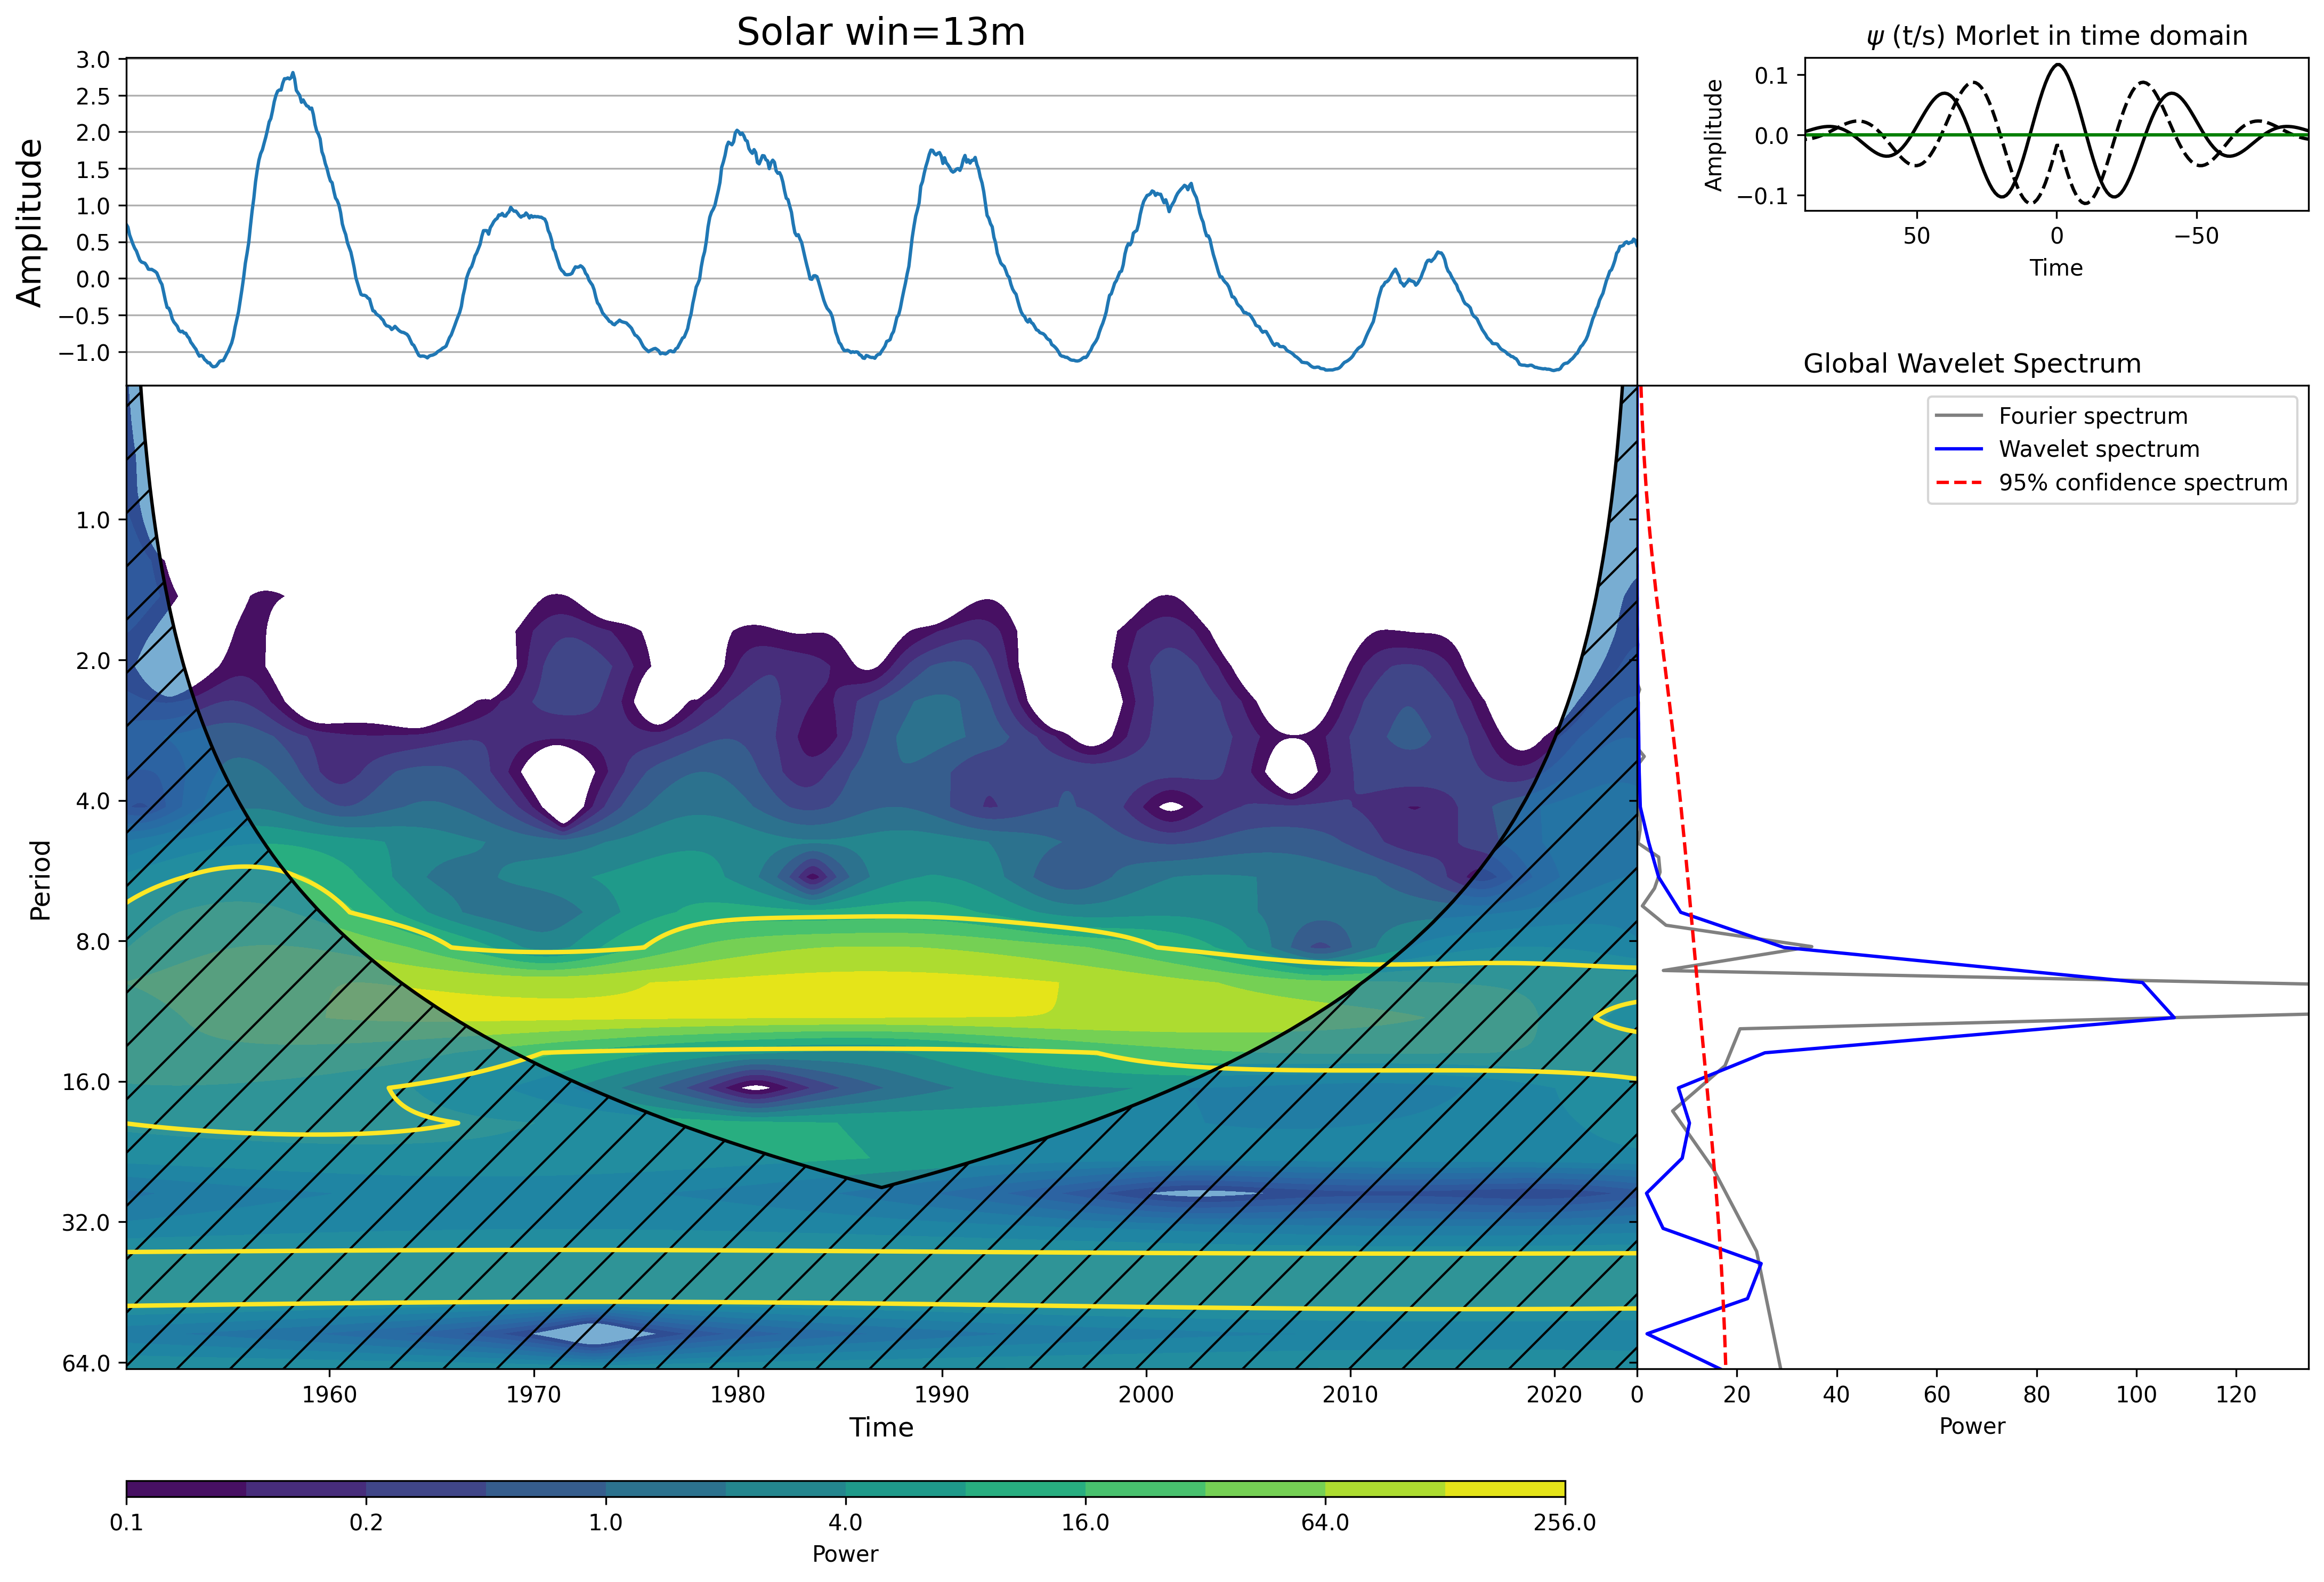

In [7]:
result_sun_mean = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Solar win=13m')
var='Solar win=13m'
dtmin = 0.25/8    # dt/n of suboctaves
waipy.wavelet_plot(var, time, data_norm, dtmin, result_sun_mean)

Nr of Scales: 28
scales [0.5, 0.5946035575013605, 0.7071067811865476, 0.8408964152537145, 1.0, 1.189207115002721, 1.4142135623730951, 1.681792830507429, 2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0]


{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <Axes: title={'center': 'Solar win=13m'}, ylabel='Amplitude'>,
 'ax_cwt': <Axes: xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <Axes: title={'center': '$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <Axes: title={'center': 'Global Wavelet Spectrum'}, xlabel='Power'>}

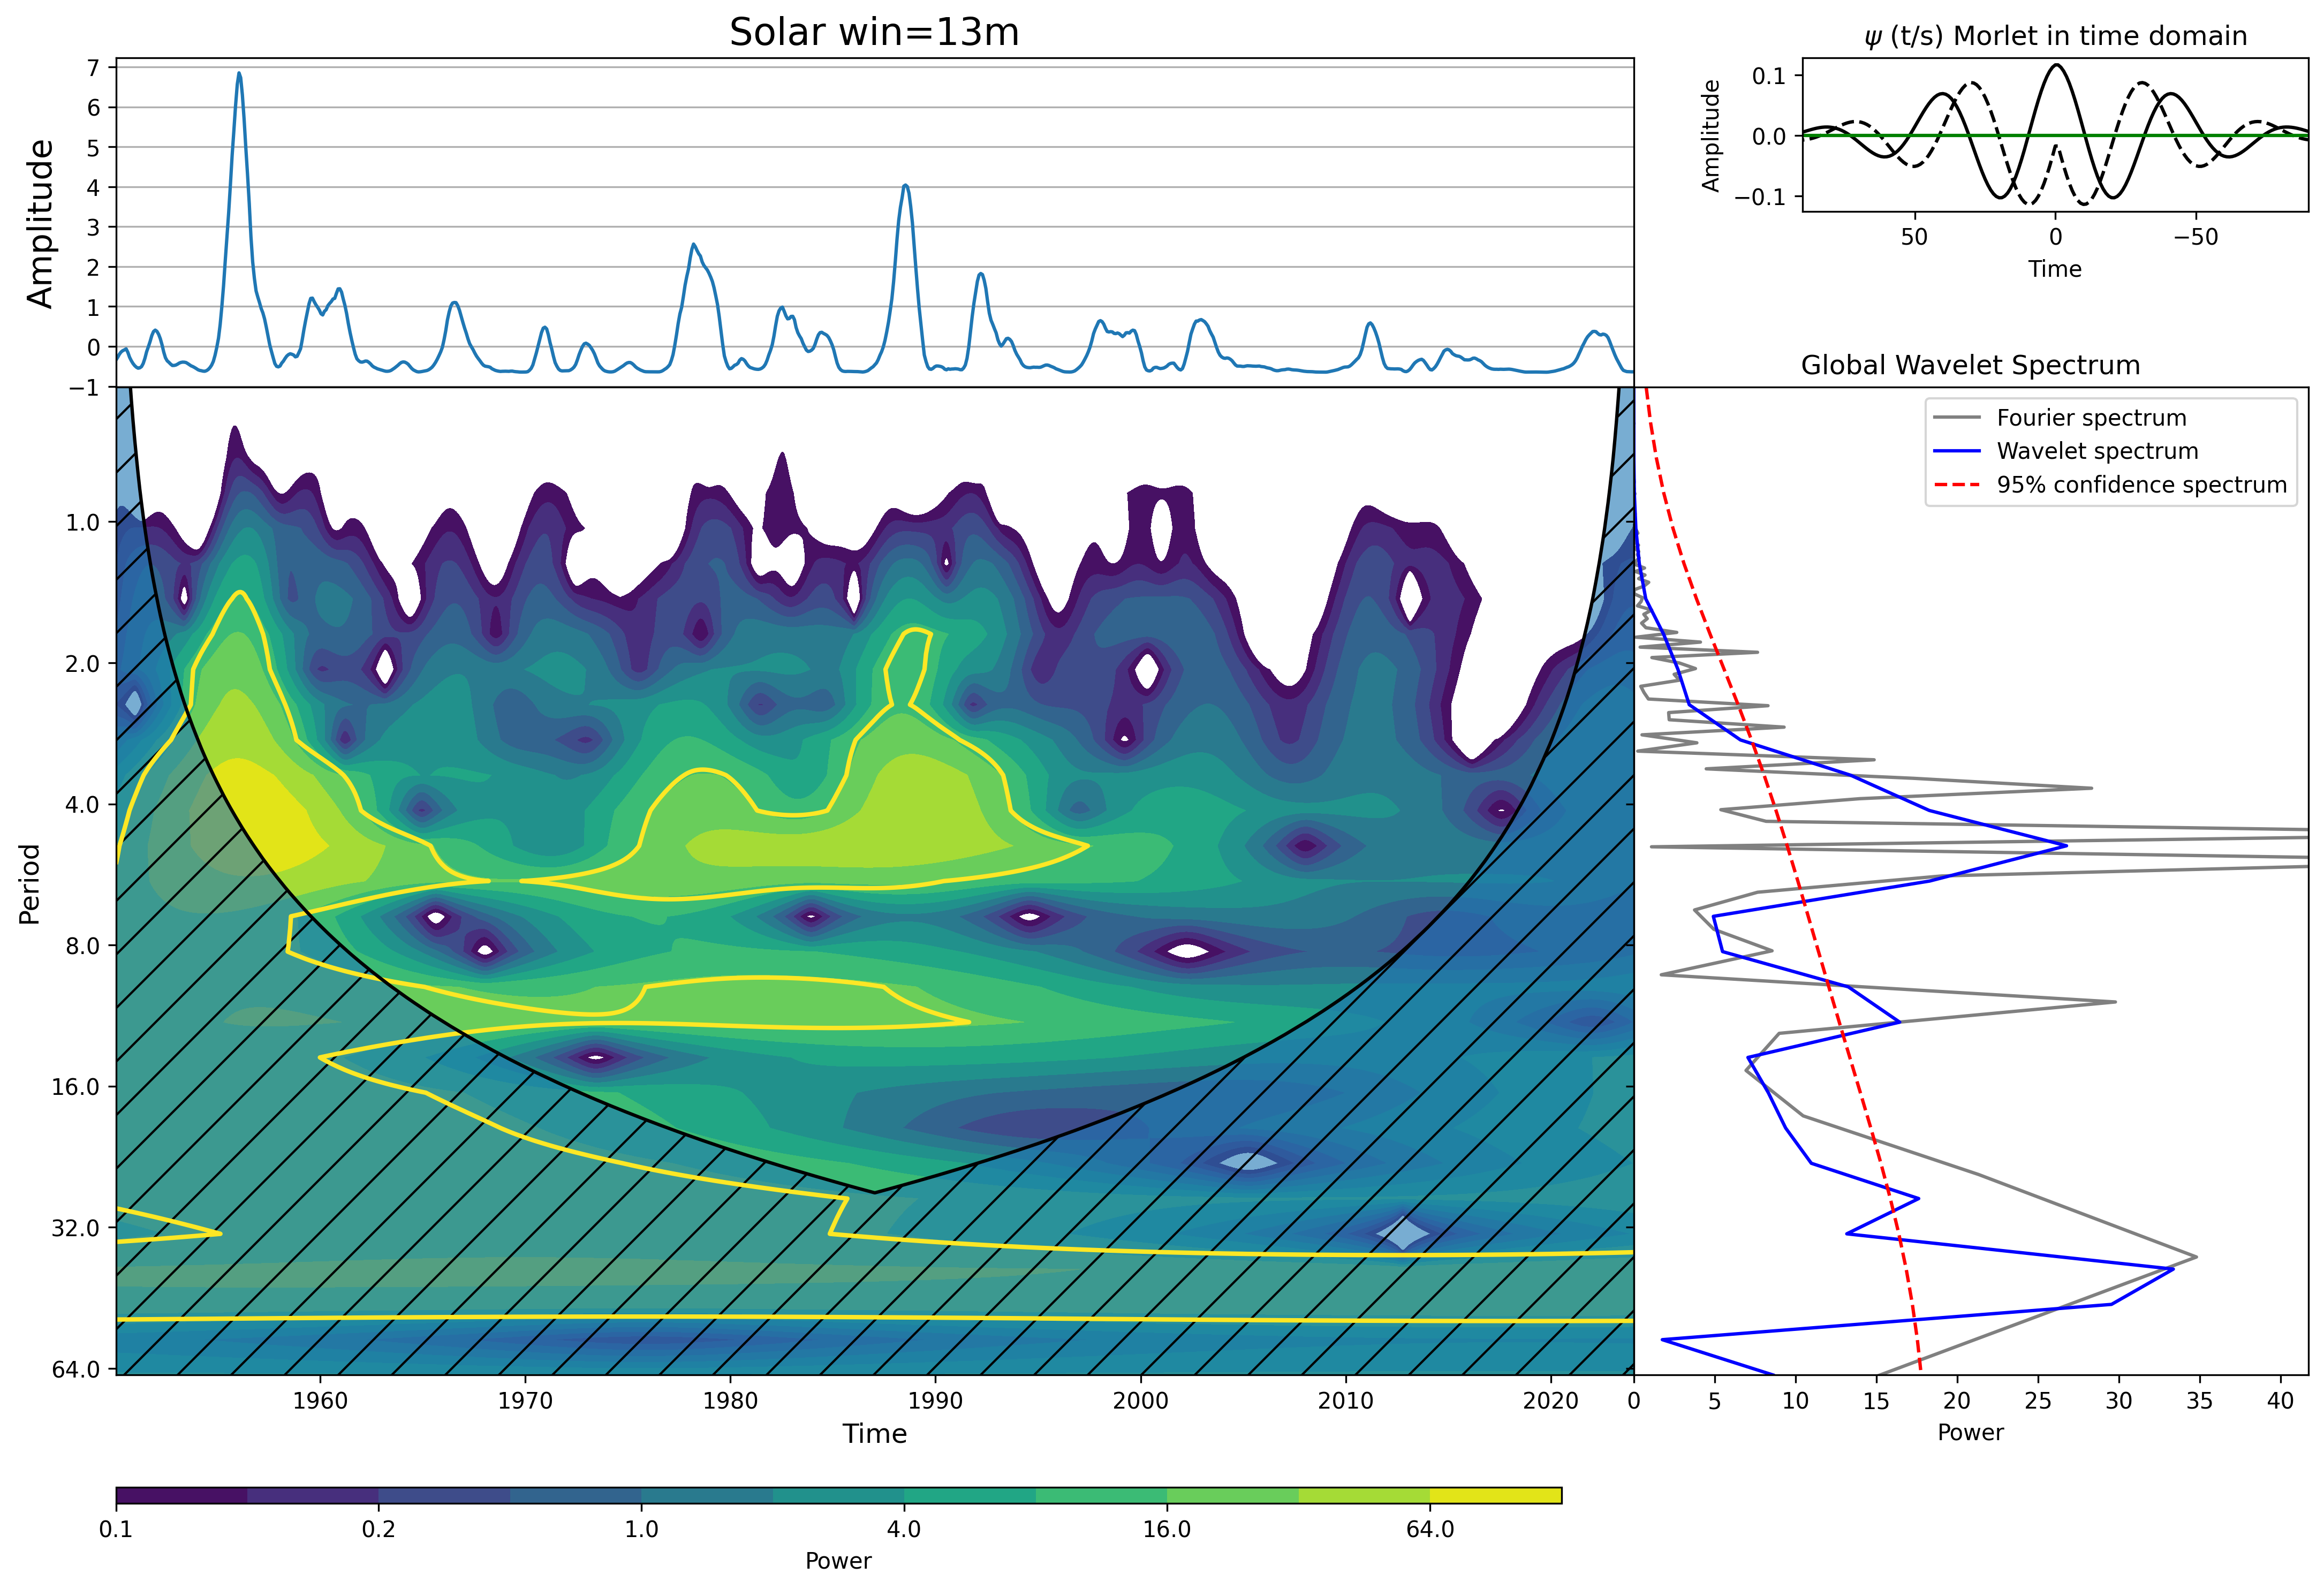

In [8]:
result_sun_var = waipy.cwt(data_norm2, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Solar win=13m')
var='Solar win=13m'
dtmin = 0.25/8    # dt/n of suboctaves
waipy.wavelet_plot(var, time, data_norm2, dtmin, result_sun_var)

Agora a CROSS....

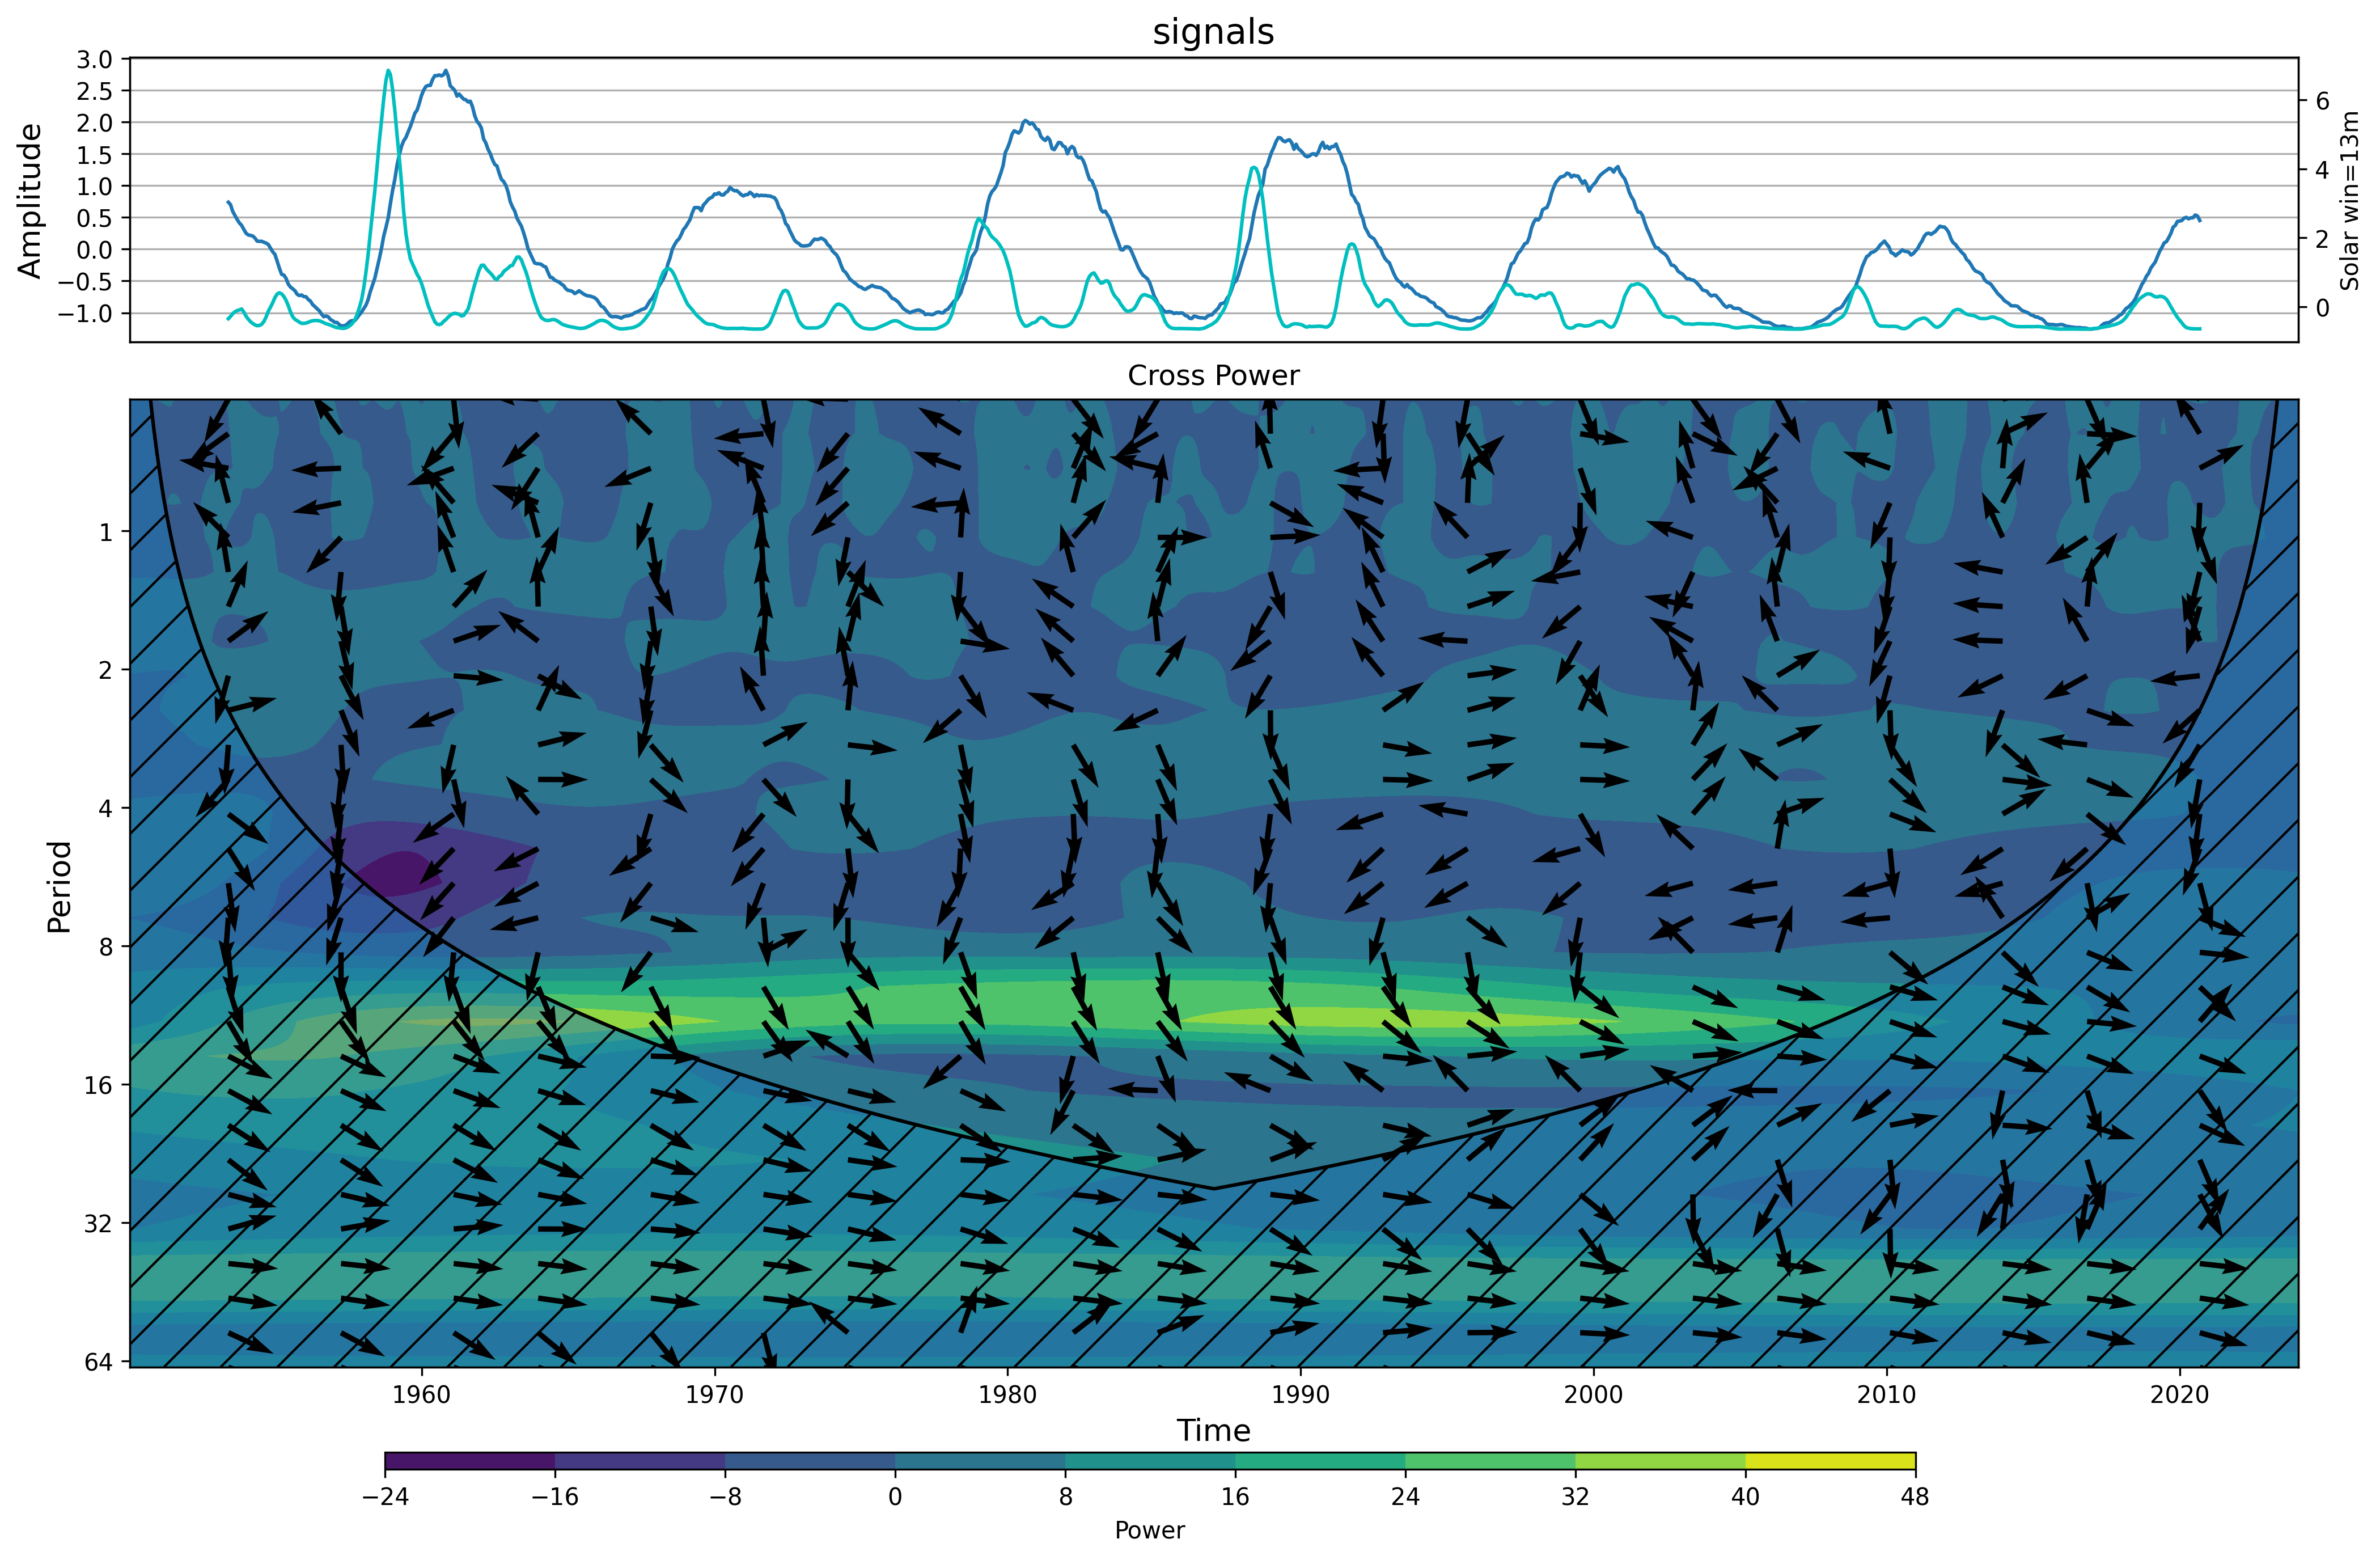

In [9]:
WPS12, coherence, phase_angle,cross_power = waipy.cross_wavelet(result_sun_mean['wave'],result_sun_var['wave'])
figname = 'cp_freqchange.png'
waipy.plot_cross('signals', cross_power, phase_angle, time, result_sun_mean, result_sun_var,figname)
#Arrows indicate in phase when pointing to the right and out of phase when pointing left.

Mais fácil ? SIM !! muito !